##Import Functions

In [1]:
## Import Necessary Functions 
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [2]:
#You will use Vine Dataset you can get the detail in the URL below
#url = "https://archive.ics.uci.edu/ml/datasets/Wine"
wine = load_wine()

In [3]:
# PRINT FOR YOUR INTUITION SO YOU KNOW THE DIMENSIONS YOU ARE WORKING WITH
print(wine.data.shape) #.data contains the features
print(wine.target.shape)
print(wine.target[0]) #.target contains the target variables

(178, 13)
(178,)
0


In [4]:
# SPLIT THE DATA INTO TRAINING AND TESTING SET
#WHEN CALLING THE DATA use vine.data instance as well as vine.target.astype('int')
#THE SPLIT OF DATA IS UPTO YOU


np.random.seed(42)
#X2_train, X2_test = train_test_split(X, y, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(wine.data, wine.target, random_state=42)

In [5]:
#CHECK THE DIMSIONS
X2_train.shape, X2_test.shape

((133, 13), (45, 13))

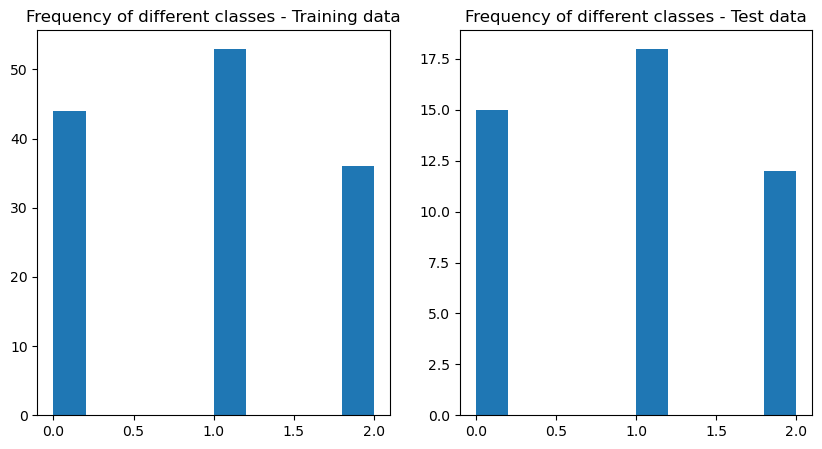

In [6]:
#CHECK THE FREQUENCY FOR YOUR INTUITION
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train.astype('int'));
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test.astype('int'));
plt.title('Frequency of different classes - Test data');


In [7]:
# DEFINE THE MODEL USING LogisticRegression Function


model0 = LogisticRegression(max_iter = 5)
model1 = LogisticRegression(max_iter = 30)
model2 = LogisticRegression(max_iter = 50)

In [8]:
#FIT THE DATA TO THE MODEL 
#WILL TAKE 3-5 MIN

model0.fit(X2_train, y2_train)
model1.fit(X2_train, y2_train)
model2.fit(X2_train, y2_train)
#lr.fit(X, y)

/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

LogisticRegression(max_iter=50)

Score against training and test data

In [9]:
#using clf2.score to get the training score & test data
train_accuracy0 = model0.score(X2_train, y2_train)
test_accuracy0 = model0.score(X2_test, y2_test)
train_accuracy1 = model1.score(X2_train, y2_train)
test_accuracy1 = model1.score(X2_test, y2_test)
train_accuracy2 = model2.score(X2_train, y2_train)
test_accuracy2 = model2.score(X2_test, y2_test)
print("+-------------------------------------Iterations @ 5-------------------------------+")
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy0), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy0), sep='\n')
print("+-------------------------------------Iterations @ 30------------------------------+")
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy1), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy1), sep='\n')
print("+-------------------------------------Iterations @ 50------------------------------+")
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy2), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy2), sep='\n')

+-------------------------------------Iterations @ 5-------------------------------+
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.62
Accuracy in Test  Group   : 0.53
+-------------------------------------Iterations @ 30------------------------------+
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.90
Accuracy in Test  Group   : 0.93
+-------------------------------------Iterations @ 50------------------------------+
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.92
Accuracy in Test  Group   : 0.96


Plot Confusion matrix

In [10]:
#FIRST GET THE PREDICTION USING clf2.predict
y_pred0 = model0.predict(X2_test)
y_pred1 = model1.predict(X2_test)
y_pred2 = model2.predict(X2_test)

acc0 = accuracy_score(y2_test, y_pred0)*100
acc1 = accuracy_score(y2_test, y_pred1)*100
acc2 = accuracy_score(y2_test, y_pred2)*100


mat0 = confusion_matrix(y2_test, y_pred0)
mat1 = confusion_matrix(y2_test, y_pred1)
mat2 = confusion_matrix(y2_test, y_pred2)

print("+-------------------------------------Iterations @ 5-------------------------------+")
print("Accuracy:", acc0, "%")
print("Confusion Matrix: ",'\n', mat0)
print("+-------------------------------------Iterations @ 30------------------------------+")
print("Accuracy:", acc1, "%")
print("Confusion Matrix: ",'\n', mat1)
print("+-------------------------------------Iterations @ 50------------------------------+")
print("Accuracy:", acc2, "%")
print("Confusion Matrix: ",'\n', mat2)



+-------------------------------------Iterations @ 5-------------------------------+
Accuracy: 53.333333333333336 %
Confusion Matrix:  
 [[15  0  0]
 [ 9  9  0]
 [ 7  5  0]]
+-------------------------------------Iterations @ 30-------------------------------+
Accuracy: 93.33333333333333 %
Confusion Matrix:  
 [[15  0  0]
 [ 0 17  1]
 [ 2  0 10]]
+-------------------------------------Iterations @ 50-------------------------------+
Accuracy: 95.55555555555556 %
Confusion Matrix:  
 [[14  1  0]
 [ 1 17  0]
 [ 0  0 12]]


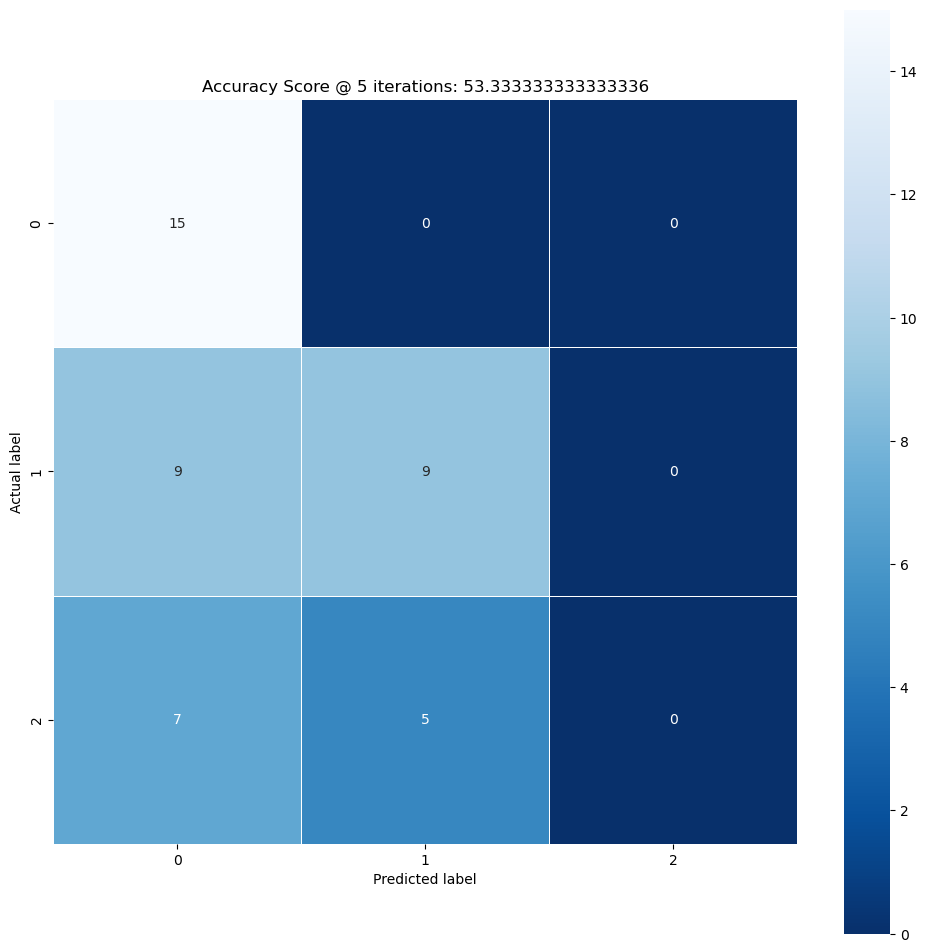

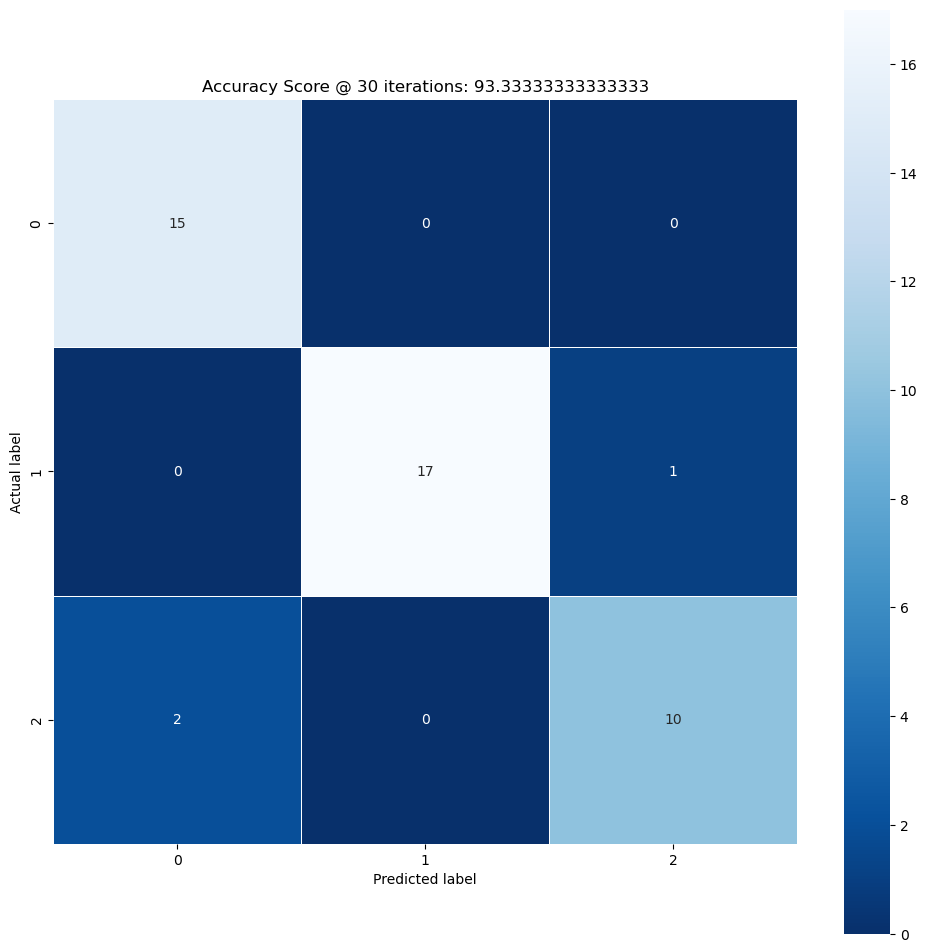

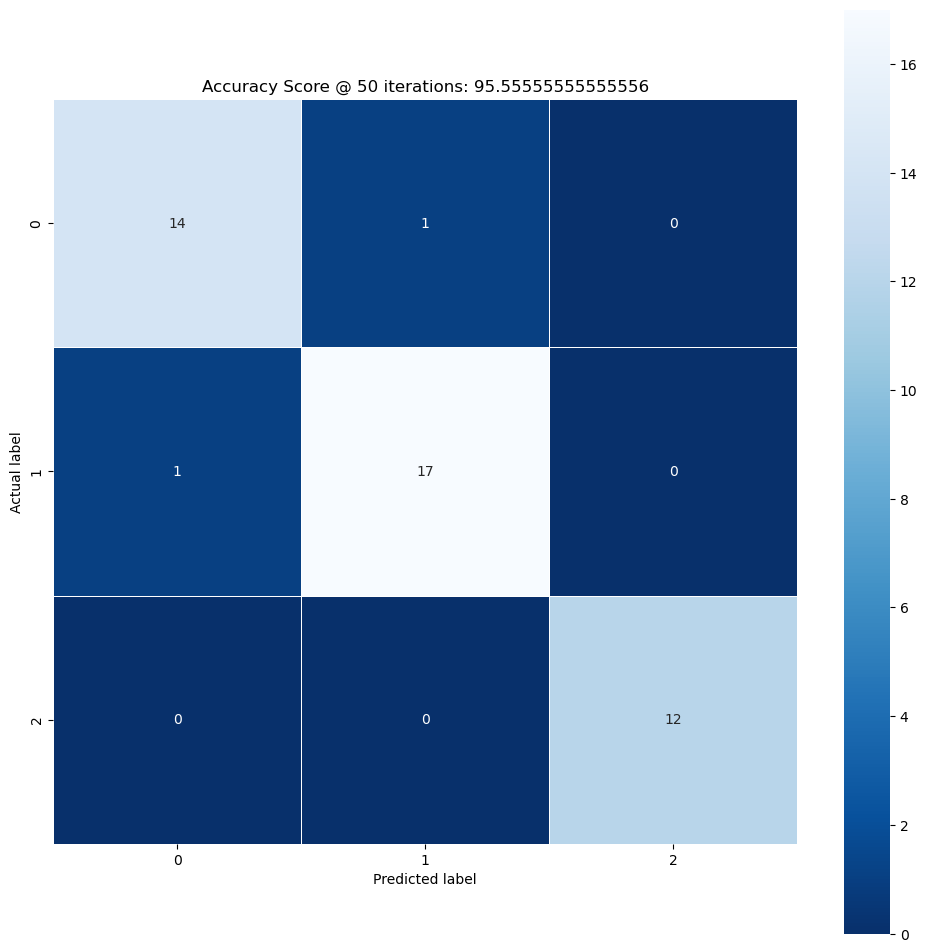

In [16]:


plt.figure(figsize=(12,12))
sns.heatmap(mat0, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score @ 5 iterations: {0}'.format(acc0)
plt.title(all_sample_title);


plt.figure(figsize=(12,12))
sns.heatmap(mat1, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score @ 30 iterations: {0}'.format(acc1)
plt.title(all_sample_title);

plt.figure(figsize=(12,12))
sns.heatmap(mat2, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score @ 50 iterations: {0}'.format(acc2)
plt.title(all_sample_title);